In [1]:
import pandas as pd

df = pd.read_csv("ache_donepezil_contacts.csv")
df


,resname,resid,chain
0,ARG,289,A
1,GLU,199,A
2,GLY,117,A
3,GLY,118,A
4,GLY,123,A
5,HIS,440,A
6,ILE,287,A
7,LEU,127,A
8,PHE,288,A
9,PHE,330,A


In [2]:
unique_res = df.drop_duplicates()
unique_res


,resname,resid,chain
0,ARG,289,A
1,GLU,199,A
2,GLY,117,A
3,GLY,118,A
4,GLY,123,A
5,HIS,440,A
6,ILE,287,A
7,LEU,127,A
8,PHE,288,A
9,PHE,330,A


In [3]:
counts = (
    df.groupby(["resname", "resid"])
      .size()
      .reset_index(name="contact_count")
      .sort_values("contact_count", ascending=False)
)

counts.head(15)


,resname,resid,contact_count
0,ARG,289,1
1,GLU,199,1
2,GLY,117,1
3,GLY,118,1
4,GLY,123,1
5,HIS,440,1
6,ILE,287,1
7,LEU,127,1
8,PHE,288,1
9,PHE,330,1


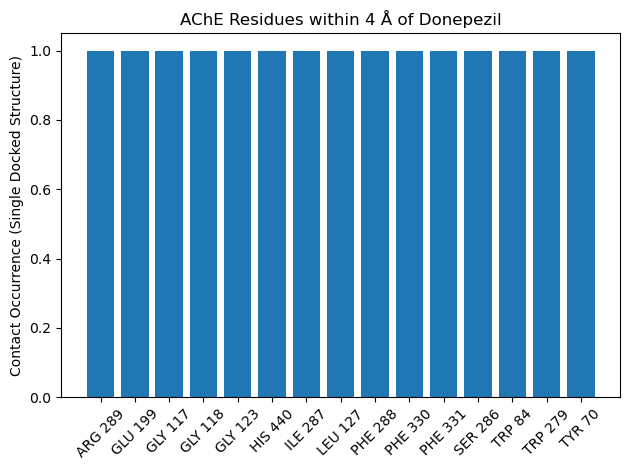

In [4]:
import matplotlib.pyplot as plt

top15 = counts.head(15)

plt.figure()
plt.bar(
    top15["resname"] + " " + top15["resid"].astype(str),
    top15["contact_count"]
)
plt.xticks(rotation=45)
plt.ylabel("Contact Occurrence (Single Docked Structure)")
plt.title("AChE Residues within 4 Å of Donepezil")
plt.tight_layout()
plt.show()


In [5]:
top15.to_csv("top15_donepezil_ache_residues.csv", index=False)
